Dữ liệu ban đầu:
              datetime      open      high       low     close  volume
0  2015-01-02 01:00:00  1183.789  1184.049  1183.120  1183.329       6
1  2015-01-02 01:01:00  1183.329  1184.010  1183.229  1183.670       5
2  2015-01-02 01:02:00  1183.670  1183.929  1183.639  1183.919       4
3  2015-01-02 01:03:00  1183.919  1184.159  1183.839  1184.000       8
4  2015-01-02 01:04:00  1184.000  1184.110  1183.929  1183.999       7

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28750 entries, 2015-01-02 01:00:00 to 2015-01-30 23:59:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    28750 non-null  float64
 1   high    28750 non-null  float64
 2   low     28750 non-null  float64
 3   close   28750 non-null  float64
 4   volume  28750 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.3 MB
None

Số lượng giá trị thiếu:
open      0
high      0
low       0
close     0
volume 

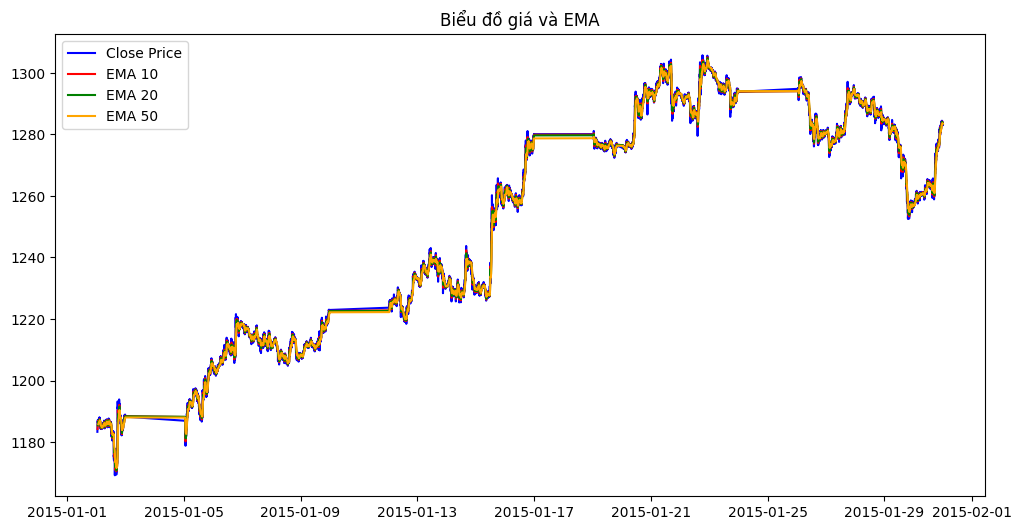

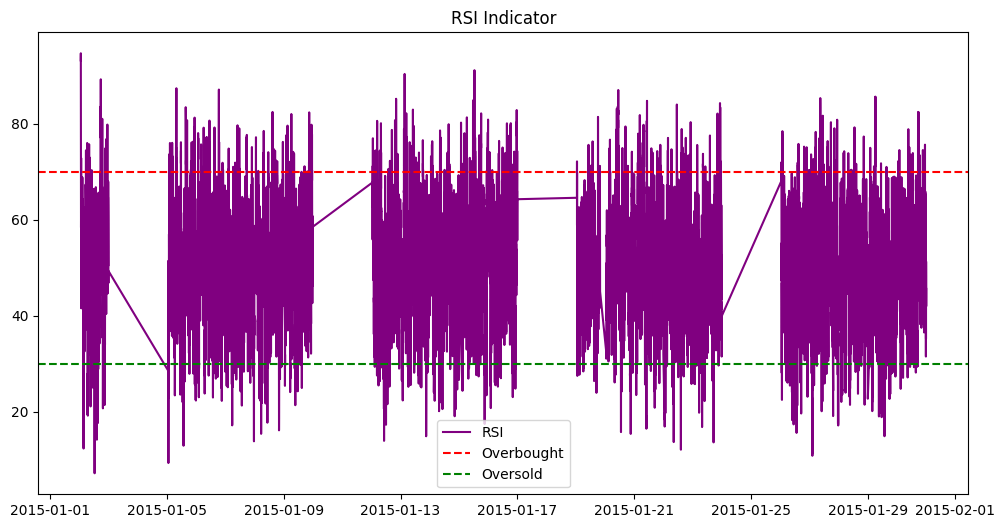

c:\Users\nguye\OneDrive\documents\python\trading_bot_rl_ppo\trading_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


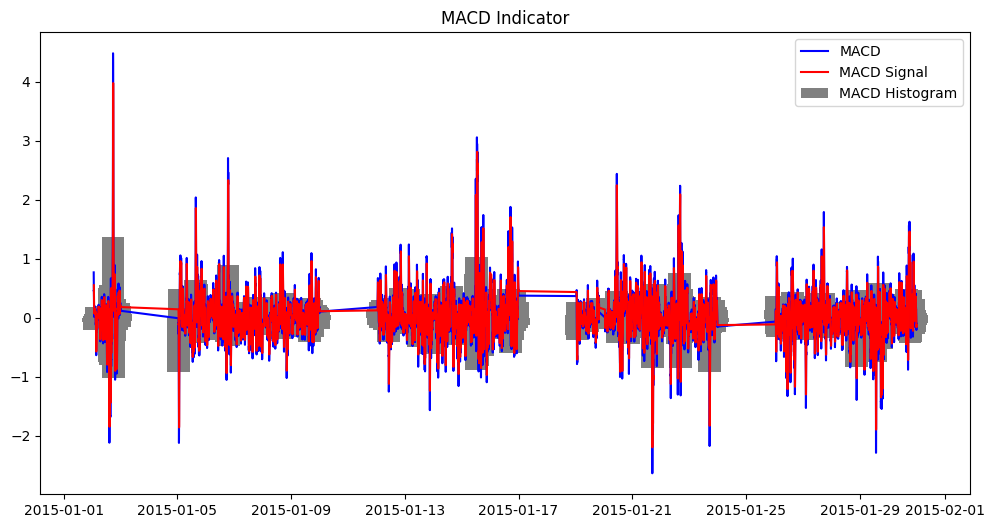


Dữ liệu sau khi thêm các đặc trưng đã được lưu tại: C:\Users\nguye\OneDrive\documents\python\trading_bot_rl_ppo\data\processed\du_lieu_phan_tich\2015\processed_features_2015_01.csv


In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from ta.trend import EMAIndicator, MACD, ADXIndicator
import os
# Đọc dữ liệu
current_working_dir = os.getcwd()
index = current_working_dir.find("trading_bot_rl_ppo")
# Cắt chuỗi đến vị trí kết thúc của "trading_bot_rl_ppo"
if index != -1:
    base_path = current_working_dir[:index + len("trading_bot_rl_ppo")]
else:
    base_path = current_working_dir  # Nếu không tìm thấy, giữ nguyên

data_path = os.path.join(base_path,r'data\raw\XAUUSD(2015-2024)\2015\XAUUSD_2015_01.csv')
data = pd.read_csv(data_path)

# Hiển thị 5 dòng đầu tiên của dữ liệu
print("Dữ liệu ban đầu:")
print(data.head())

# Chuyển cột datetime thành kiểu datetime và đặt làm chỉ mục
if 'datetime' in data.columns:
    data['datetime'] = pd.to_datetime(data['datetime'])
    data.set_index('datetime', inplace=True)

# Kiểm tra dữ liệu
print("\nThông tin dữ liệu:")
print(data.info())
print("\nSố lượng giá trị thiếu:")
print(data.isnull().sum())

# Tạo các đặc trưng kỹ thuật
def create_technical_features(df):
    print("\nĐang tính toán các chỉ báo kỹ thuật...")
    
    # RSI
    df['rsi'] = RSIIndicator(close=df['close'], window=14).rsi()

    # EMA
    df['ema10'] = EMAIndicator(close=df['close'], window=10).ema_indicator()
    df['ema20'] = EMAIndicator(close=df['close'], window=20).ema_indicator()
    df['ema50'] = EMAIndicator(close=df['close'], window=50).ema_indicator()

    # MACD
    macd = MACD(close=df['close'], window_slow=26, window_fast=12, window_sign=9)
    df['macd'] = macd.macd()
    df['macd_signal'] = macd.macd_signal()
    df['macd_hist'] = macd.macd_diff()

    # ADX
    adx = ADXIndicator(high=df['high'], low=df['low'], close=df['close'], window=14)
    df['adx'] = adx.adx()
    df['c_DI'] = adx.adx_pos()
    df['t_DI'] = adx.adx_neg()

    # Fibonacci retracement
    rolling_high = df['high'].rolling(window=50).max()
    rolling_low = df['low'].rolling(window=50).min()
    df['fibonacci_23.6'] = rolling_high - 0.236 * (rolling_high - rolling_low)
    df['fibonacci_38.2'] = rolling_high - 0.382 * (rolling_high - rolling_low)
    df['fibonacci_50.0'] = rolling_high - 0.5 * (rolling_high - rolling_low)
    df['fibonacci_61.8'] = rolling_high - 0.618 * (rolling_high - rolling_low)

    print("Hoàn thành việc tính toán các chỉ báo!")
    return df

# Tạo các đặc trưng kỹ thuật
data = create_technical_features(data)

# Kiểm tra dữ liệu sau khi tạo đặc trưng
print("\nDữ liệu sau khi thêm các đặc trưng kỹ thuật:")
print(data.head())

# Trực quan hóa một số đặc trưng
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['close'], label='Close Price', color='blue')
plt.plot(data.index, data['ema10'], label='EMA 10', color='red')
plt.plot(data.index, data['ema20'], label='EMA 20', color='green')
plt.plot(data.index, data['ema50'], label='EMA 50', color='orange')
plt.title("Biểu đồ giá và EMA")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['rsi'], label='RSI', color='purple')
plt.axhline(y=70, color='red', linestyle='--', label='Overbought')
plt.axhline(y=30, color='green', linestyle='--', label='Oversold')
plt.title("RSI Indicator")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['macd'], label='MACD', color='blue')
plt.plot(data.index, data['macd_signal'], label='MACD Signal', color='red')
plt.bar(data.index, data['macd_hist'], label='MACD Histogram', color='gray')
plt.title("MACD Indicator")
plt.legend()
plt.show()
# Lưu dữ liệu sau khi xử lý
output_path = os.path.join(base_path,r'data\processed\du_lieu_phan_tich\2015\du_lieu_vang_phan_tich_2015_01.csv')
data.to_csv(output_path)
print(f"\nDữ liệu sau khi thêm các đặc trưng đã được lưu tại: {output_path}")
